<a href="https://colab.research.google.com/github/willystumblr/AI-ML_Team_5/blob/kms/NLP_Week_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 1

**Note:** This notebook can run using TensorFlow 2.5.0

In [ ]:
!pip install tensorflow==2.5.0

In [1]:
import tensorflow as tf
print(tf.__version__)

# !pip install -q tensorflow-datasets

2.6.0


In [2]:
import tensorflow_datasets as tfds
imdb, info = tfds.load("imdb_reviews", with_info=True, as_supervised=True)
print(imdb)
print("\n")
print(info)

{'test': <PrefetchDataset shapes: ((), ()), types: (tf.string, tf.int64)>, 'train': <PrefetchDataset shapes: ((), ()), types: (tf.string, tf.int64)>, 'unsupervised': <PrefetchDataset shapes: ((), ()), types: (tf.string, tf.int64)>}


tfds.core.DatasetInfo(
    name='imdb_reviews',
    version=1.0.0,
    description='Large Movie Review Dataset.
This is a dataset for binary sentiment classification containing substantially more data than previous benchmark datasets. We provide a set of 25,000 highly polar movie reviews for training, and 25,000 for testing. There is additional unlabeled data for use as well.',
    homepage='http://ai.stanford.edu/~amaas/data/sentiment/',
    features=FeaturesDict({
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
        'text': Text(shape=(), dtype=tf.string),
    }),
    total_num_examples=100000,
    splits={
        'test': 25000,
        'train': 25000,
        'unsupervised': 50000,
    },
    supervised_keys=('text', 'label'),


In [3]:
import numpy as np

train_data, test_data = imdb['train'], imdb['test']

training_sentences = []
training_labels = []

testing_sentences = []
testing_labels = []

## Numpy library
C언어로 구현된 파이썬 라이브러리 

벡터 및 행렬 연산에 있어서 편리한 기능을 제공한다고 함. 

array라는 단위로 데이터를 관리하며 이에 대해 연산을 수행함.

* matplotlib
* pandas 

출처: https://doorbw.tistory.com/171

## Train/Test/Validation Set
### Train set
모델을 학습하기 위한 dataset이다. 한 가지 계속 명심해야할 중요한 사실은
> 모델을 학습하는데에는 오직 유일하게 Train dataset만 이용한다.

보통 train set을 이용해 각기 다른 모델을 서로 다른 epoch로 학습을 시킨다. 여기서 각기 다른 모델이란 hidden layer 혹은 hyper parameter에 약간씩 변화를 줌을 뜻한다.

### Test Set & Validation Set
* validation set: 학습이 이미 완료된 모델을 검증하기 위한 dataset
* test set: 학습과 검증이 완료된 모델의 성능을 평가하기 위한 dataset

보통 Train : Test 데이터를 8 : 2로 나누는데 여기서 Train 데이터 중 일부를 validation set으로 이용하여 Train : Validation : Test 을 일반적으로 6 : 2 : 2로 이용한다.

출처: https://ganghee-lee.tistory.com/38 

validation set과 test set의 공통점은 이 데이터를 통해 모델을 update 즉, 학습을 시키지 않는다는 것이다. 이렇게 validation set과 test set은 둘다 이미 학습을 완료한 모델에 대해 평가하고 학습을 시키지 않는데...

> 그렇다면 둘의 차이는 과연 무엇일까?

Validation set은 모델을 update, 즉 학습을 시키진 않지만 학습에 '관여'는 한다. 반면 Test set은 학습에 전혀 관여하지 않고 오직 '최종 성능'을 평가하기 위해 쓰인다.

In [4]:
# str(s.tonumpy()) is needed in Python3 instead of just s.numpy()
for s,l in train_data:
  training_sentences.append(s.numpy().decode('utf8'))
  training_labels.append(l.numpy())
  
for s,l in test_data:
  testing_sentences.append(s.numpy().decode('utf8'))
  testing_labels.append(l.numpy())
  
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

print(training_labels_final.shape)
print(testing_labels_final.shape)

(25000,)
(25000,)


In [5]:
vocab_size = 10000
embedding_dim = 16
max_length = 120
trunc_type='post'
oov_tok = "<OOV>"


from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences,maxlen=max_length, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences,maxlen=max_length)


## Hyperparameter
A model hyperparameter is a configuration that is external to the model and whose value cannot be estimated from data.

- They are often used in processes to help estimate model parameters.
- They are often specified by the practitioner.
- They can often be set using heuristics.
- They are often tuned for a given predictive modeling problem.

하이퍼 파라미터는 모델링할 때 **사용자가 직접 세팅해주는 값**을 뜻합니다. (They are often specified by the practitioner) learning rate나 서포트 벡터 머신에서의 C, sigma 값, KNN에서의 K값 등등 굉장히 많습니다. 머신러닝 모델을 쓸 때 사용자가 직접 세팅해야 하는 값은 상당히 많습니다. 그 모든 게 다 하이퍼 파라미터입니다. 하지만, 많은 사람들이 그런 값들을 조정할 때 그냥 '모델의 파라미터를 조정한다'라는 표현을 씁니다. 원칙적으로는 '모델의 하이퍼 파라미터를 조정한다'라고 해야 합니다.

하이퍼 파라미터는 정해진 최적의 값이 없습니다. 휴리스틱한 방법이나 경험 법칙(rules of thumb)에 의해 결정하는 경우가 많습니다. (They can often be set using heuristics) 베이지안 옵티미제이션과 같이 자동으로 하이퍼 파라미터를 선택해주는 라이브러리도 있긴 합니다.

파라미터와 하이퍼 파라미터를 구분하는 기준은 사용자가 직접 설정하느냐 아니냐입니다. 사용자가 직접 설정하면 하이퍼 파라미터, 모델 혹은 데이터에 의해 결정되면 파라미터입니다.


출처: [여기](https://bkshin.tistory.com/entry/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-13-%ED%8C%8C%EB%9D%BC%EB%AF%B8%ED%84%B0Parameter%EC%99%80-%ED%95%98%EC%9D%B4%ED%8D%BC-%ED%8C%8C%EB%9D%BC%EB%AF%B8%ED%84%B0Hyper-parameter)



In [11]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_review(padded[3])) 
print(training_sentences[3]) 

? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? this is the kind of film for a snowy sunday afternoon when the rest of the world can go ahead with its own business as you <OOV> into a big arm chair and <OOV> for a couple of hours wonderful performances from cher and nicolas cage as always gently row the plot along there are no <OOV> to cross no dangerous waters just a warm and witty <OOV> through new york life at its best a family film in every sense and one that deserves the praise it received
This is the kind of film for a snowy Sunday afternoon when the rest of the world can go ahead with its own business as you descend into a big arm-chair and mellow for a couple of hours. Wonderful performances from Cher and Nicolas Cage (as always) gently row the plot along. There are no rapids to cross, no dangerous waters, just a warm and witty paddle through New York life at its best. A family film in every sense and one that deserves the praise it received.


`decode_review(text)`의 역할: padding 된 부분의 빈 공간을 `?`로 채우는 것?

In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 120, 16)           160000    
_________________________________________________________________
flatten (Flatten)            (None, 1920)              0         
_________________________________________________________________
dense (Dense)                (None, 6)                 11526     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 171,533
Trainable params: 171,533
Non-trainable params: 0
_________________________________________________________________


## 활성화함수
딥러닝 네트워크에서 노드에 입력된 값들을 비선형 함수에 통과시킨 후 다음 레이어로 전달하는데, 이 때 사용하는 함수를 활성화 함수(Activation Function)라고 한다. 인공신경망에서 활성화 함수는 입력 데이터를 다음 레이어로 어떻게 출력하느냐를 결정하는 역할이기 때문에 매우 중요하다.
### ReLU 
![image.png](https://mblogthumb-phinf.pstatic.net/MjAyMDAyMjVfOTIg/MDAxNTgyNjA4MzI2NDA5.e0VyX0yrhE5gtfPjni7IxF5kpArCeByreQsdOMB0240g.CWwTi57bPtAK6C7eLmRn1ED2RE8Lm_C6sVIwMGJS1Akg.PNG.handuelly/image.png?type=w800)

x가 0보다 크면 기울기가 1인 직선, 0보다 작으면 함수 값이 0이 됨.

### Sigmoid 
![image.png](https://mblogthumb-phinf.pstatic.net/MjAyMDAyMjVfMjI4/MDAxNTgyNjA3MjY0NzIy.tR76IK8YsIL8XORjYDJoMSNBK2nhpUooUhMS6N0d1NUg.bMGce-shmpX6--ck-mvfcTimMjL3UpFw2iSgQgExCR8g.PNG.handuelly/image.png?type=w800)

Logistic 함수라고 불리기도 하며, x의 값에 따라 0~1의 값을 출력하는 S자형 함수이다.

In [14]:
num_epochs = 20
model.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

Epoch 1/20
782/782 [==============================] - 6s 8ms/step - loss: 9.4803e-05 - accuracy: 1.0000 - val_loss: 0.8397 - val_accuracy: 0.8272
Epoch 2/20
782/782 [==============================] - 6s 7ms/step - loss: 5.8522e-05 - accuracy: 1.0000 - val_loss: 0.8744 - val_accuracy: 0.8271
Epoch 3/20
782/782 [==============================] - 7s 9ms/step - loss: 3.6345e-05 - accuracy: 1.0000 - val_loss: 0.9094 - val_accuracy: 0.8267
Epoch 4/20
782/782 [==============================] - 7s 9ms/step - loss: 2.3100e-05 - accuracy: 1.0000 - val_loss: 0.9428 - val_accuracy: 0.8267
Epoch 5/20
782/782 [==============================] - 7s 9ms/step - loss: 1.4718e-05 - accuracy: 1.0000 - val_loss: 0.9819 - val_accuracy: 0.8266
Epoch 6/20
782/782 [==============================] - 7s 9ms/step - loss: 9.2451e-06 - accuracy: 1.0000 - val_loss: 1.0119 - val_accuracy: 0.8258
Epoch 7/20
782/782 [==============================] - 6s 7ms/step - loss: 7.0696e-06 - accuracy: 1.0000 - val_loss: 1.0505 -

## for 10 epochs...

`Epoch 1/10
782/782 [==============================] - 10s 9ms/step - loss: 0.5049 - accuracy: 0.7328 - val_loss: 0.3418 - val_accuracy: 0.8493`

`Epoch 2/10
782/782 [==============================] - 6s 7ms/step - loss: 0.2371 - accuracy: 0.9086 - val_loss: 0.3750 - val_accuracy: 0.8390`

`Epoch 3/10
782/782 [==============================] - 7s 9ms/step - loss: 0.0834 - accuracy: 0.9796 - val_loss: 0.4582 - val_accuracy: 0.8284`

`Epoch 4/10
782/782 [==============================] - 6s 7ms/step - loss: 0.0191 - accuracy: 0.9980 - val_loss: 0.5395 - val_accuracy: 0.8261`

`Epoch 5/10
782/782 [==============================] - 6s 8ms/step - loss: 0.0054 - accuracy: 0.9996 - val_loss: 0.6024 - val_accuracy: 0.8260`

`Epoch 6/10
782/782 [==============================] - 6s 7ms/step - loss: 0.0020 - accuracy: 0.9999 - val_loss: 0.6499 - val_accuracy: 0.8270`

`Epoch 7/10
782/782 [==============================] - 7s 9ms/step - loss: 8.4575e-04 - accuracy: 1.0000 - val_loss: 0.6905 - val_accuracy: 0.8273`

`Epoch 8/10
782/782 [==============================] - 7s 9ms/step - loss: 4.4742e-04 - accuracy: 1.0000 - val_loss: 0.7298 - val_accuracy: 0.8275`

`Epoch 9/10
782/782 [==============================] - 6s 7ms/step - loss: 2.5462e-04 - accuracy: 1.0000 - val_loss: 0.7671 - val_accuracy: 0.8276`

`Epoch 10/10
782/782 [==============================] - 7s 9ms/step - loss: 1.5567e-04 - accuracy: 1.0000 - val_loss: 0.8054 - val_accuracy: 0.8278`

`<keras.callbacks.History at 0x7f60f8da7650>`

20번 후...
* loss: 3.0485e-08
* accuracy: 1.0000
* val_loss: 1.4565
* val_accuracy: 0.8252

### Epoch(에포크)
> Epoch의 네이버 영어 사전 뜻은, "(중요한 사건·변화들이 일어난) 시대"라는 뜻이다. 훈련 데이터셋에 포함된 모든 데이터들이 한 번씩 모델을 통과한 횟수로, 모든 학습 데이터셋을 학습하는 횟수를 의미한다. 1 epoch는 전체 학습 데이터셋이 한 신경망에 적용되어 순전파와 역전파를 통해 신경망을 한 번 통과했다는 의미가 된다. 즉 epoch가 10회라면, 학습 데이터 셋 A를 10회 모델에 학습시켰다는 것이다. epoch를 높일수록, 다양한 무작위 가중치로 학습을 해보므로, 적합한 파라미터를 찾을 확률이 올라간다. 즉, 손실 값이 내려가게 된다. 그러나, 지나치게 epoch를 높이게 되면, 그 학습 데이터셋에 과적합(Overfitting)되어 다른 데이터에 대해선 제대로 된 예측을 하지 못할 수 있다.
>
출처: https://gooopy.tistory.com/68 

In [15]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

(10000, 16)


In [16]:
import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [17]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

다운된 파일을 Embedding projector로 열어보면...
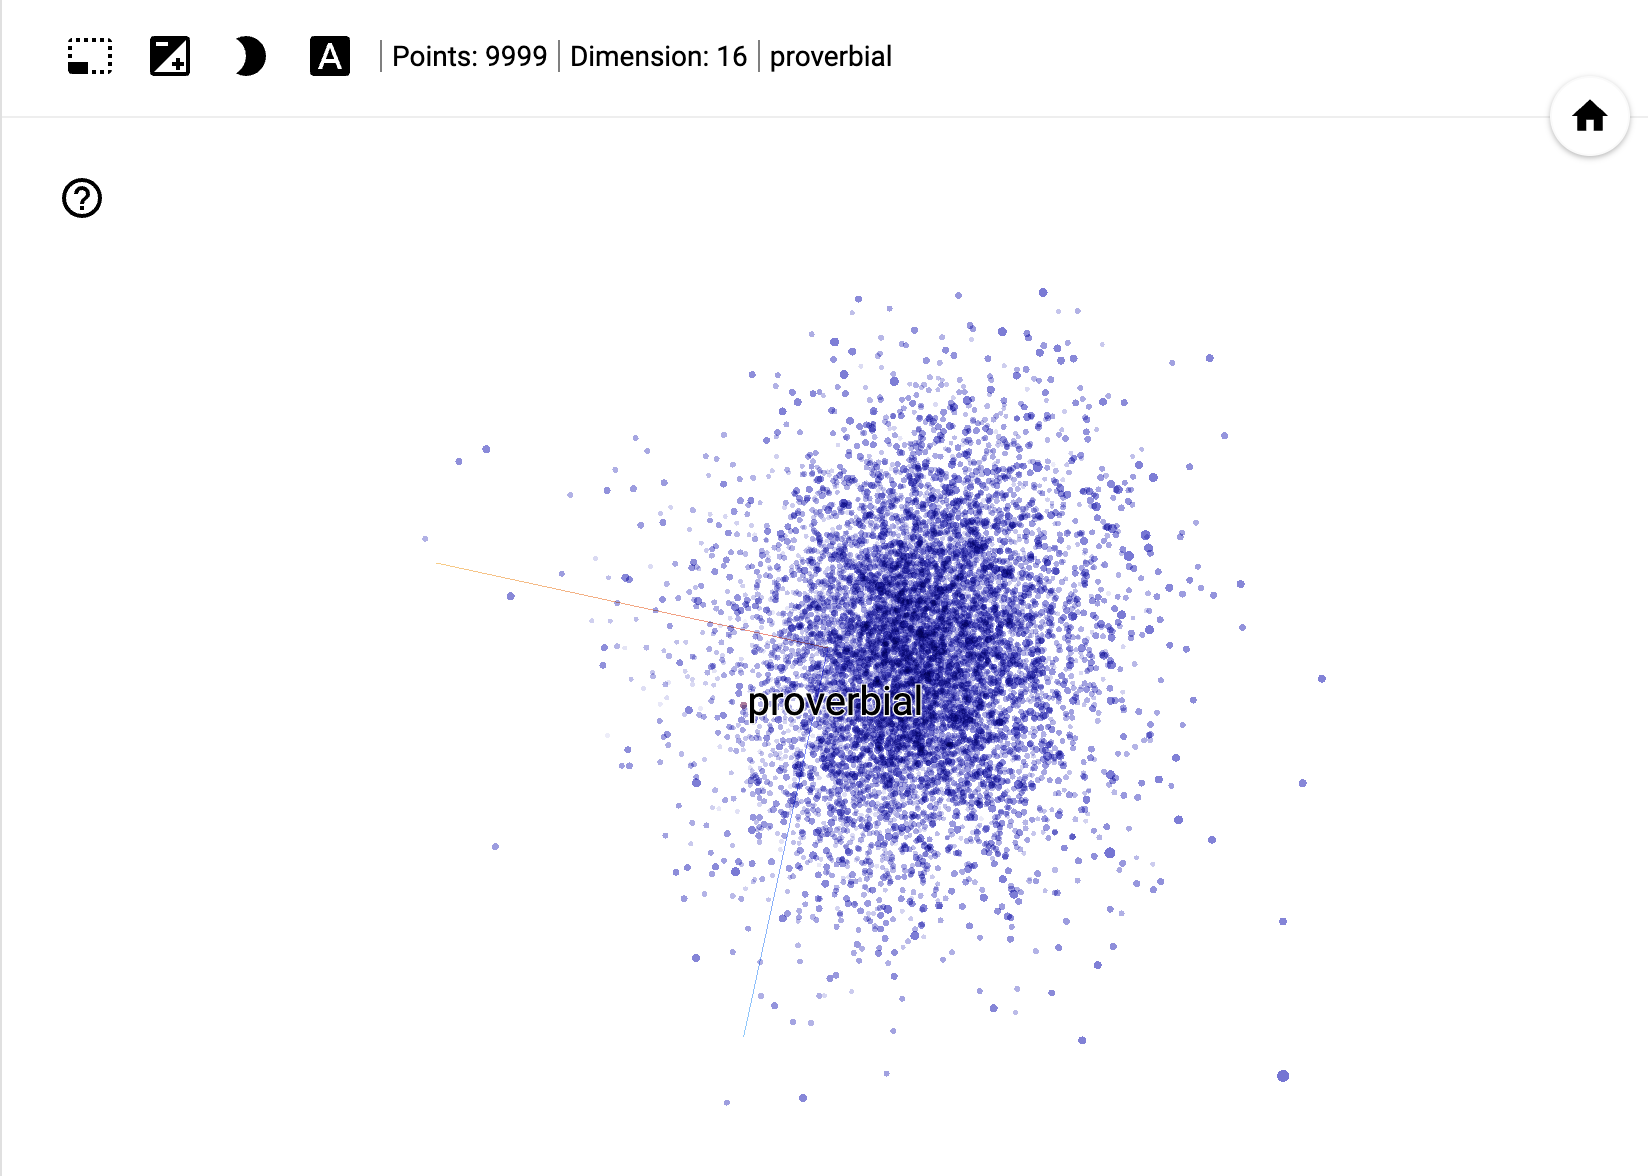





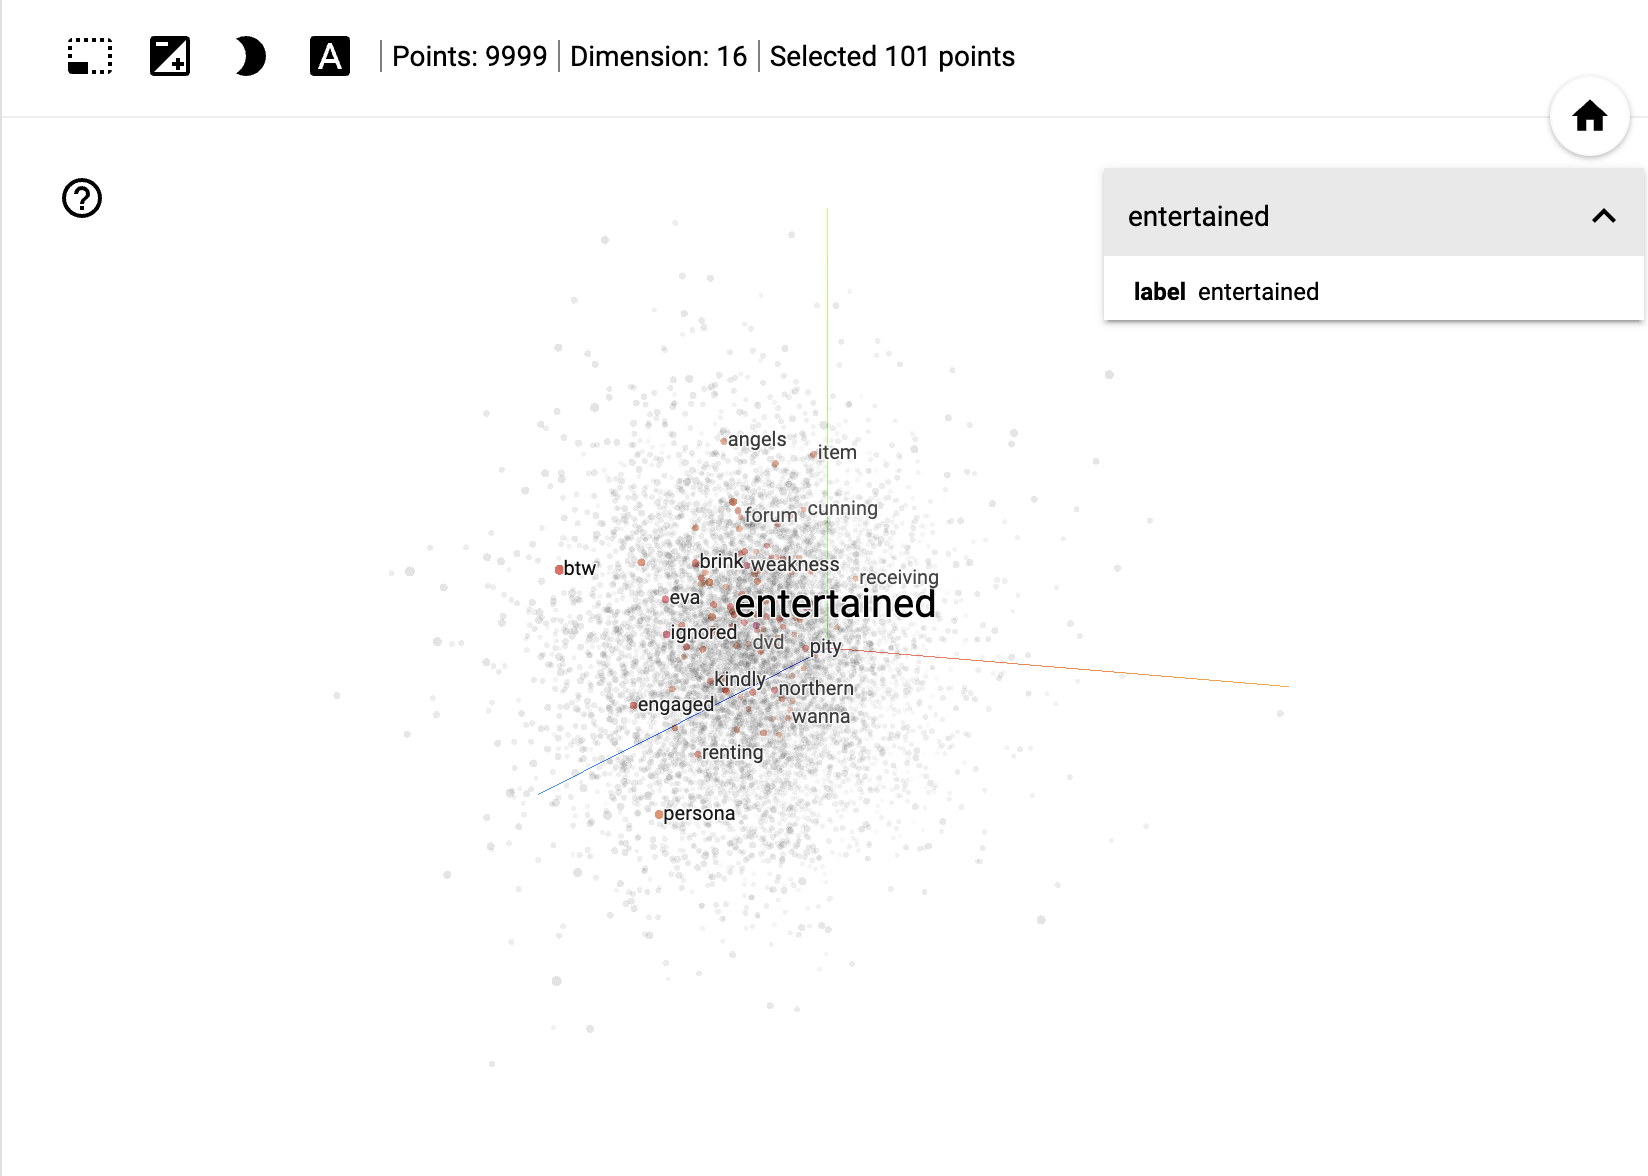

In [18]:
sentence = "I really think this is amazing. honest."
sequence = tokenizer.texts_to_sequences([sentence])
print(sequence)

[[11, 64, 102, 12, 7, 478, 1200]]


# Chapter 2

In [19]:
import json
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [23]:
vocab_size = 10000
embedding_dim = 16
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000

In [20]:
# sarcasm.json
!gdown --id 1xRU3xY5-tkiPGvlz5xBJ18_pHWSRzI4v

Downloading...
From: https://drive.google.com/uc?id=1xRU3xY5-tkiPGvlz5xBJ18_pHWSRzI4v
To: /content/sarcasm.json
100% 5.64M/5.64M [00:00<00:00, 88.3MB/s]


In [21]:
with open("./sarcasm.json", 'r') as f:
    datastore = json.load(f)

sentences = []
labels = []

for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

In [24]:
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [30]:
import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [31]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [32]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

## Loss function
### `binary_crossentropy` 
참고 자료: [Binary Crossentropy](https://curt-park.github.io/2018-09-19/loss-cross-entropy/)

In [33]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 16)           160000    
_________________________________________________________________
global_average_pooling1d_1 ( (None, 16)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 24)                408       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 25        
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [35]:
num_epochs = 30
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/30
625/625 - 3s - loss: 0.6702 - accuracy: 0.5636 - val_loss: 0.6223 - val_accuracy: 0.5824
Epoch 2/30
625/625 - 3s - loss: 0.4781 - accuracy: 0.7982 - val_loss: 0.4018 - val_accuracy: 0.8390
Epoch 3/30
625/625 - 3s - loss: 0.3248 - accuracy: 0.8731 - val_loss: 0.3577 - val_accuracy: 0.8517
Epoch 4/30
625/625 - 3s - loss: 0.2674 - accuracy: 0.8982 - val_loss: 0.3450 - val_accuracy: 0.8560
Epoch 5/30
625/625 - 3s - loss: 0.2298 - accuracy: 0.9126 - val_loss: 0.3451 - val_accuracy: 0.8551
Epoch 6/30
625/625 - 3s - loss: 0.2027 - accuracy: 0.9235 - val_loss: 0.3487 - val_accuracy: 0.8560
Epoch 7/30
625/625 - 3s - loss: 0.1801 - accuracy: 0.9321 - val_loss: 0.3730 - val_accuracy: 0.8460
Epoch 8/30
625/625 - 3s - loss: 0.1609 - accuracy: 0.9414 - val_loss: 0.3819 - val_accuracy: 0.8501
Epoch 9/30
625/625 - 3s - loss: 0.1452 - accuracy: 0.9480 - val_loss: 0.4054 - val_accuracy: 0.8432
Epoch 10/30
625/625 - 3s - loss: 0.1321 - accuracy: 0.9539 - val_loss: 0.4071 - val_accuracy: 0.8512

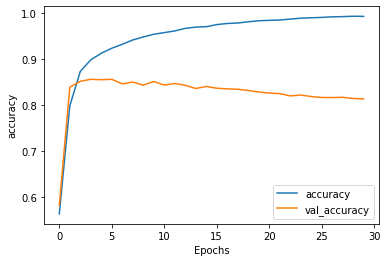

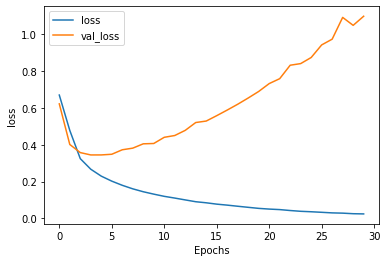

In [36]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

* val_accuracy가 하향한다..?
* val_loss가 어느 순간 상향한다?
=> epoch를 무턱대고 많이 하면 안되는구나..

In [40]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_sentence(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_sentence(training_padded[0]))
print(training_sentences[2])
print(labels[2])

former <OOV> store clerk sues over secret 'black <OOV> for minority shoppers ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?
mom starting to fear son's web series closest thing she will have to grandchild
1


In [41]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)


(10000, 16)


In [42]:
sentence = ["granny starting to fear spiders in the garden might be real", "game of thrones season finale showing this sunday night"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(model.predict(padded))

[[7.6400131e-01]
 [1.8569994e-10]]


# Chapter 3

In [8]:
import tensorflow as tf

In [1]:
import tensorflow_datasets as tfds
imdb, info = tfds.load("imdb_reviews/subwords8k", with_info=True, as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteJ8KNS1/imdb_reviews-train.tfrecord


  0%|          | 0/25000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteJ8KNS1/imdb_reviews-test.tfrecord


  0%|          | 0/25000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteJ8KNS1/imdb_reviews-unsupervised.tfrecord


  0%|          | 0/50000 [00:00<?, ? examples/s]

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


## Subword
subword란, 단순한 단어 하나에도 작은 의미들이 뭉쳐있는데, 그 단위를 말하는 것이다. 한국어 단어를 예시로 들면 "집중"은 직역하면 "가운데"로 "모은다"라는 두 가지 의미를 담고 있다. 그래서 자연어처리를 할 때 이런 작은 단위들로 분절한다면 더 좋은 성능을 발휘할 것이다. 

출처: [여기](https://junsik-hwang.tistory.com/64)

## Byte Pair Encoding (BPE) 알고리즘
*  압축 알고리즘을 활용하여 subword segmentation을 적용 (Sennrich at el., 2015)
*  학습 코퍼스를 활용하여 BPE 모델을 학습 후, 학습/테스트 코퍼스에 적용

장점
- 희소성을 통계에 기반하여 효과적으로 낮출 수 있음
- 언어별 특성에 대한 정보 없이, 더 작은 의미 단위로 분절할 수 있음
- OoV를 없앨 수 있음 (seen character로만 구성될 경우)

단점
- 학습 데이터 별로 BPE 모델도 생성됨

출처: [UGONG2SAN](https://ugong2san.tistory.com/2501) 

In [2]:
train_data, test_data = imdb['train'], imdb['test']

In [ ]:
tokenizer = info.features['text'].encoder
print(tokenizer.subwords)
#너무 길어서 print된 부분은 생략

In [5]:
sample_string = 'TensorFlow, from basics to mastery'

tokenized_string = tokenizer.encode(sample_string)
print ('Tokenized string is {}'.format(tokenized_string))

original_string = tokenizer.decode(tokenized_string)
print ('The original string: {}'.format(original_string))


Tokenized string is [6307, 2327, 4043, 2120, 2, 48, 4249, 4429, 7, 2652, 8050]
The original string: TensorFlow, from basics to mastery


In [6]:
for ts in tokenized_string:
  print ('{} ----> {}'.format(ts, tokenizer.decode([ts])))

6307 ----> Ten
2327 ----> sor
4043 ----> Fl
2120 ----> ow
2 ----> , 
48 ----> from 
4249 ----> basi
4429 ----> cs 
7 ----> to 
2652 ----> master
8050 ----> y


In [9]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_data.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_data.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_data))

## Batch size & Buffer size
### Batch size
먼저 batch 의 사전적 의미를 보겠습니다. batch를 영어사전에 검색하면 아래와 같은 뜻이 나옵니다. batch 는 일괄적이라는 뜻이 포함되네요.
> 전체 트레이닝 데이터 셋을 여러 작은 그룹을 나누었을 때 batch size는 하나의 소그룹에 속하는 데이터 수를 의미합니다. 전체 트레이닝 셋을 작게 나누는 이유는 트레이닝 데이터를 통째로 신경망에 넣으면 비효율적이 리소스 사용으로 학습 시간이 오래 걸리기 때문입니다. 
>

### Buffer size
`shuffle(BUFFER_SIZE)`: input pipeline을 생성하는데 training 데이터를 랜덤하게 셔플하는 기능
예를 들어,
고양이 이미지를 학습중이며 데이터가 다음과 같은 방식으로 가정해보자(각 카테고리에 10000개의 이미지가 있음).
```
train/  
  cat/
    filename_00001.jpg
    filename_00002.jpg
    ...
  not_cat/
    filename_10001.jpg
    filename_10002.jpg
```
tf.data를 사용하여 데이터를 입력하는 스탠다드한 방법은
파일 이름 목록과 그에 대응되는 라벨 목록을 가져오고
tf.data.Dataset.from_tensor_slices()를 사용하여 dataset을 만드는 것이다.
```
filenames = ["filename_00001.jpg", "filename_00002.jpg", ... ,
             "filename_10001.jpg", "filename_10002.jpg", ... ]
labels    = [1, 1, ... , 0, 0, ... ] # 1은 고양이, 0은 고양이가 아닌것

dataset   = tf.data.Dataset.from_tensor_slices((filenames, labels))
dataset   = dataset.shuffle(buffer_size=1000) # 1000이 충분히 옳은가?  
dataset   = dataset.batch(100)
```
위 코드의 큰 문제는 dataset이 올바른 방법으로 실제로 섞이지 않는다는 것이다.
고양이 이미지만 dataset에서 보게 될 것이다.
이는 training의 성능을 낮추게 될 것이 분명하다.

_**training을 시작할때, dataset은 처음 1000개의 filenames를 buffer에 가져올것이고,
그런 다음에 1000개 중에 랜덤하게 100개를 pick할 것이다.**_

모든 첫 1000개의 이미지는 고양이 이미지이기 때문에 오직 고양이 이미지만 pick하게 되는것이다.

그렇다면 buffer_size는 몇으로 설정해주어야할까?
buffer_size를 20000이상으로 설정하거나,
사전에 파일이름과 라벨을 shuffle해서 dataset을 만들어야 한다.
(사전에 shuffle을 할 경우에도 물론 파일이름과 라벨 순서는 동일하도록 해야한다.)

또한, 모든 파일이름과 라벨을 메모리에 저장하는것은 큰 문제가 아니므로 buffer_size=len(filenames)을 사용할 수 있다.


In [10]:
embedding_dim = 64
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, embedding_dim),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
global_average_pooling1d (Gl (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 6)                 390       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 524,237
Trainable params: 524,237
Non-trainable params: 0
_________________________________________________________________


In [11]:
num_epochs = 10

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

history = model.fit(train_dataset, epochs=num_epochs, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 11s 19ms/step - loss: 0.6642 - accuracy: 0.6485 - val_loss: 0.5968 - val_accuracy: 0.7425
Epoch 2/10
391/391 [==============================] - 8s 18ms/step - loss: 0.4827 - accuracy: 0.8226 - val_loss: 0.4145 - val_accuracy: 0.8476
Epoch 3/10
391/391 [==============================] - 7s 17ms/step - loss: 0.3424 - accuracy: 0.8809 - val_loss: 0.3446 - val_accuracy: 0.8686
Epoch 4/10
391/391 [==============================] - 7s 17ms/step - loss: 0.2795 - accuracy: 0.8994 - val_loss: 0.3259 - val_accuracy: 0.8676
Epoch 5/10
391/391 [==============================] - 8s 18ms/step - loss: 0.2451 - accuracy: 0.9130 - val_loss: 0.3129 - val_accuracy: 0.8777
Epoch 6/10
391/391 [==============================] - 8s 18ms/step - loss: 0.2207 - accuracy: 0.9206 - val_loss: 0.3060 - val_accuracy: 0.8798
Epoch 7/10
391/391 [==============================] - 8s 18ms/step - loss: 0.2031 - accuracy: 0.9263 - val_loss: 0.3067 - val_accuracy: 0.881

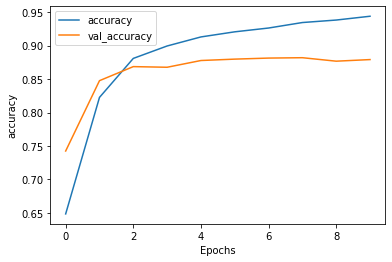

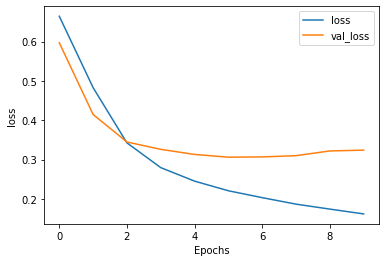

In [12]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [13]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, tokenizer.vocab_size):
  word = tokenizer.decode([word_num])
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()


try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

(8185, 64)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

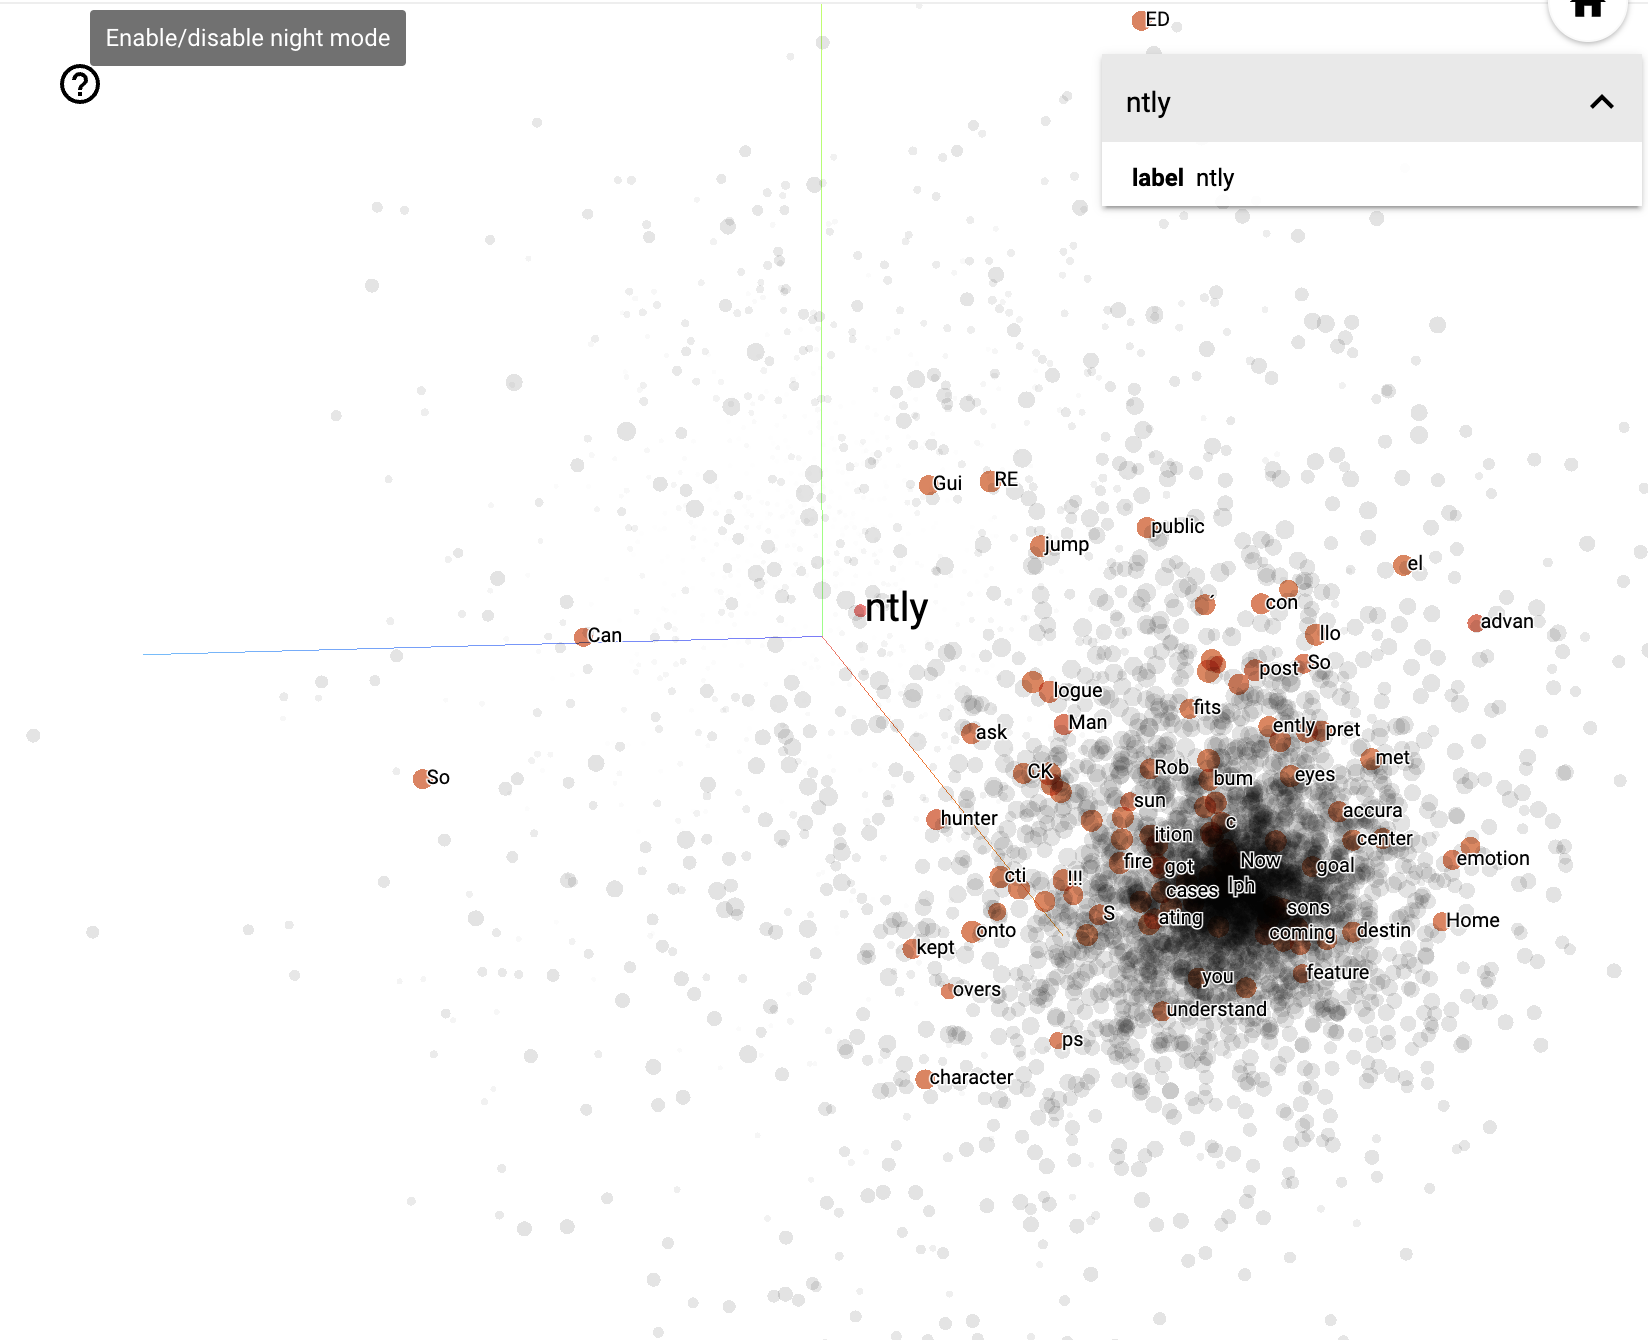

단어가 꽤나 분절된 걸 알 수 있음..

# Quiz 2

1. What is the name of the TensorFlow library containing common data that you can use to train and test neural networks?
  * TensorFlow Data
  * There is no library of common data sets, you have to use your own
  * **TensorFlow Datasets**
  * TensorFlow Data Libraries

2. How many reviews are there in the IMDB dataset and how are they split?
  * 50,000 records, 80/20 train/test split
  * 60,000 records, 80/20 train/test split
  * **50,000 records, 50/50 train/test split**
  * 60,000 records, 50/50 train/test split


3. How are the labels for the IMDB dataset encoded?
  * Reviews encoded as a number 1-10
  * Reviews encoded as a boolean true/false
  * Reviews encoded as a number 1-5
  * **Reviews encoded as a number 0-1**

4. What is the purpose of the embedding dimension?
  * It is the number of words to encode in the embedding
  * It is the number of letters in the word, denoting the size of the encoding
  * It is the number of dimensions required to encode every word in the corpus
  * **It is the number of dimensions for the vector representing the word encoding**

5. When tokenizing a corpus, what does the `num_words=n` parameter do?
  * It specifies the maximum number of words to be tokenized, and stops tokenizing when it reaches n
  * It errors out if there are more than n distinct words in the corpus
  * It specifies the maximum number of words to be tokenized, and picks the first ‘n’ words that were tokenized
  * **It specifies the maximum number of words to be tokenized, and picks the most common ‘n’ words**

6. To use word embeddings in TensorFlow, in a sequential layer, what is the name of the class?
  * tf.keras.layers.Word2Vector
  * tf.keras.layers.Embed
  * **tf.keras.layers.Embedding**
  * tf.keras.layers.WordEmbedding

7. IMDB Reviews are either positive or negative. What type of loss function should be used in this scenario?
  * **Binary crossentropy**
  * Categorical crossentropy
  * Adam
  * Binary Gradient descent

8. When using IMDB Sub Words dataset, our results in classification were poor. Why?
  * We didn’t train long enough
  * The sub words make no sense, so can’t be classified
  * **Sequence becomes much more important when dealing with subwords, but we’re ignoring word positions**
  * Our neural network didn’t have enough layers


Score: (8/8)




